## Data Loading & Processing

In [1]:
# %matplotlib widget

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob # to read multiple files
import plotly.express as px
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
all_files = glob.glob(r'individual_stocks_5yr/*.csv')
print(len(all_files))

505


In [5]:
company_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB', 'NFLX']
all_data = pd.DataFrame()

for company in company_list:
    df = pd.read_csv(f'individual_stocks_5yr/{company}_data.csv', encoding='iso-8859-1', on_bad_lines='skip')
    all_data = pd.concat([all_data, df], ignore_index=True)

print(all_data.head())

         date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL


In [6]:
# all_data.describe()
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7554 entries, 0 to 7553
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7554 non-null   object 
 1   open    7554 non-null   float64
 2   high    7554 non-null   float64
 3   low     7554 non-null   float64
 4   close   7554 non-null   float64
 5   volume  7554 non-null   int64  
 6   Name    7554 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 413.2+ KB


In [7]:
all_data.drop_duplicates(inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7554 entries, 0 to 7553
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7554 non-null   object 
 1   open    7554 non-null   float64
 2   high    7554 non-null   float64
 3   low     7554 non-null   float64
 4   close   7554 non-null   float64
 5   volume  7554 non-null   int64  
 6   Name    7554 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 413.2+ KB


In [8]:
print(all_data['date'].min(), all_data['date'].max())
type(all_data['date'][0])

2013-02-08 2018-02-07


str

In [9]:
# Convert date from string data type to datetime
all_data['date'] = pd.to_datetime(all_data['date'])

## Visualizing the data

#### Plotting the timeseries of the 6 companies over 5 years

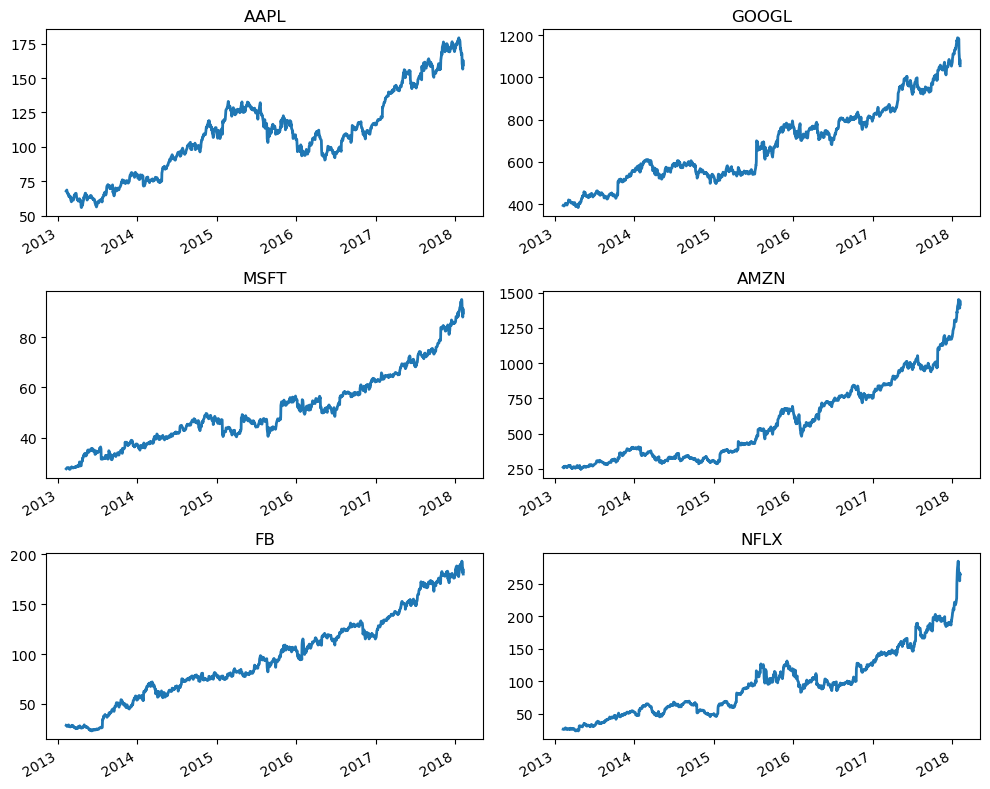

In [10]:
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(10, 8)

for index, company in enumerate(company_list):
    df = all_data[all_data.Name == company]
    df = df[['date', 'close']]
    df.set_index('date', inplace=True)
    
    df['close'].plot(ax=axs[index//2, index%2], title=company, xlabel='', linewidth=2)

plt.tight_layout()
plt.show()

#### Moving Average

To smooth out short-term fluctuations and highlight longer-term trends or cycles of the timeseries data, let's calculate the moving average series.


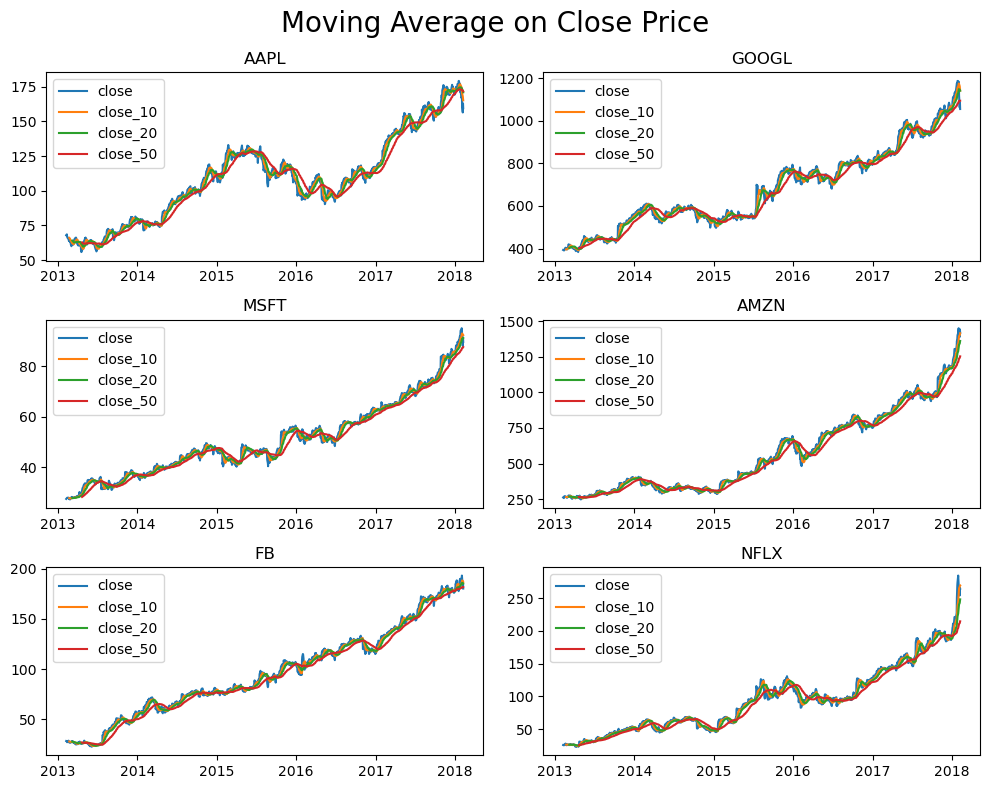

In [11]:
plt.figure(figsize=(10, 8))
plt.suptitle('Moving Average on Close Price', fontsize=20)


for index, company in enumerate(company_list):
    df = all_data[all_data.Name == company]
    df = df[['date', 'close']]
    df.set_index('date', inplace=True)

    df['close_10'] = df['close'].rolling(window=10).mean()
    df['close_20'] = df['close'].rolling(window=20).mean()
    df['close_50'] = df['close'].rolling(window=50).mean()

    plt.subplot(3, 2, index+1)
    # plt.plot(df.index, df['close'], label='Close')
    # plt.plot(df.index, df['moving_average'], label='Moving Average')
    plt.plot(df, label=df.columns.values)
    plt.title(f'{company}')
    plt.legend()

plt.tight_layout()
plt.show()


### Analysing apple data

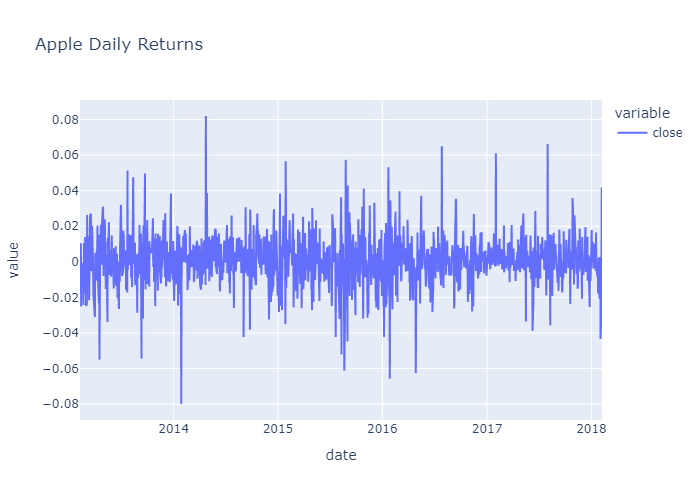

In [12]:
apple_data = all_data[all_data.Name == 'AAPL']
apple_data = apple_data[['date', 'close']]
apple_data.set_index('date', inplace=True)

# plt.figure(figsize=(10, 8))
# plt.plot(apple_data.pct_change())
# plt.title('Apple Daily Returns')
# plt.show()

daily_return = apple_data.pct_change()
fig = px.line(daily_return, title='Apple Daily Returns')
fig.show('png')

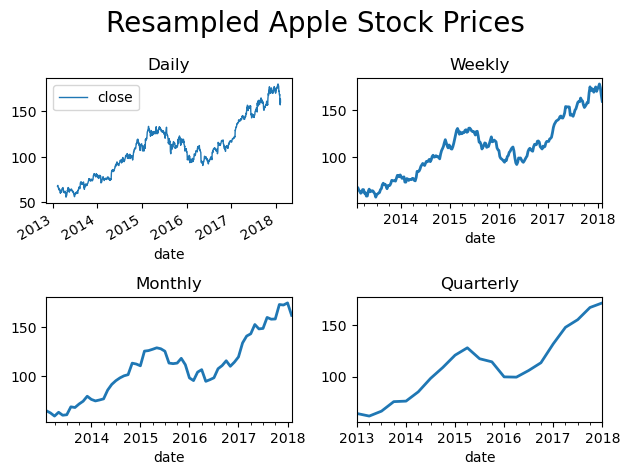

In [13]:
# Resample the data to a different time frequency
apple_data_weekly = apple_data['close'].resample('W').mean()
apple_data_monthly = apple_data['close'].resample('M').mean()
apple_data_quarterly = apple_data['close'].resample('Q').mean()


# Visualize the resampled data
figure, axes = plt.subplots(2, 2)
plt.suptitle('Resampled Apple Stock Prices', fontsize=20)
apple_data.plot(ax=axes[0,0], title='Daily', linewidth=1)
apple_data_weekly.plot(ax=axes[0,1], title='Weekly', linewidth=2)
apple_data_monthly.plot(ax=axes[1,0], title='Monthly', linewidth=2)
apple_data_quarterly.plot(ax=axes[1,1], title='Quarterly', linewidth=2)
plt.tight_layout()


#### Checking for Correlation

In [14]:
closing_prices = all_data.pivot(index='date', columns='Name', values='close')
print(all_data['date'].unique().shape)
print(closing_prices.shape)
closing_prices.describe()

(1259,)
(1259, 6)


Name,AAPL,AMZN,FB,GOOGL,MSFT,NFLX
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,109.066698,576.880041,96.478610,682.233847,51.063081,94.906152
std,30.556812,282.500395,43.799446,187.573892,14.852117,50.716019
min,55.789900,248.230000,22.899000,383.340000,27.370000,23.294300
25%,84.830650,325.800000,64.861750,543.022500,40.310000,53.139250
50%,109.010000,503.820000,90.950000,652.470000,47.520000,91.610000
75%,127.120000,777.420000,126.145000,806.400000,59.730000,123.720000
max,179.260000,1450.890000,193.090000,1187.560000,95.010000,284.590000


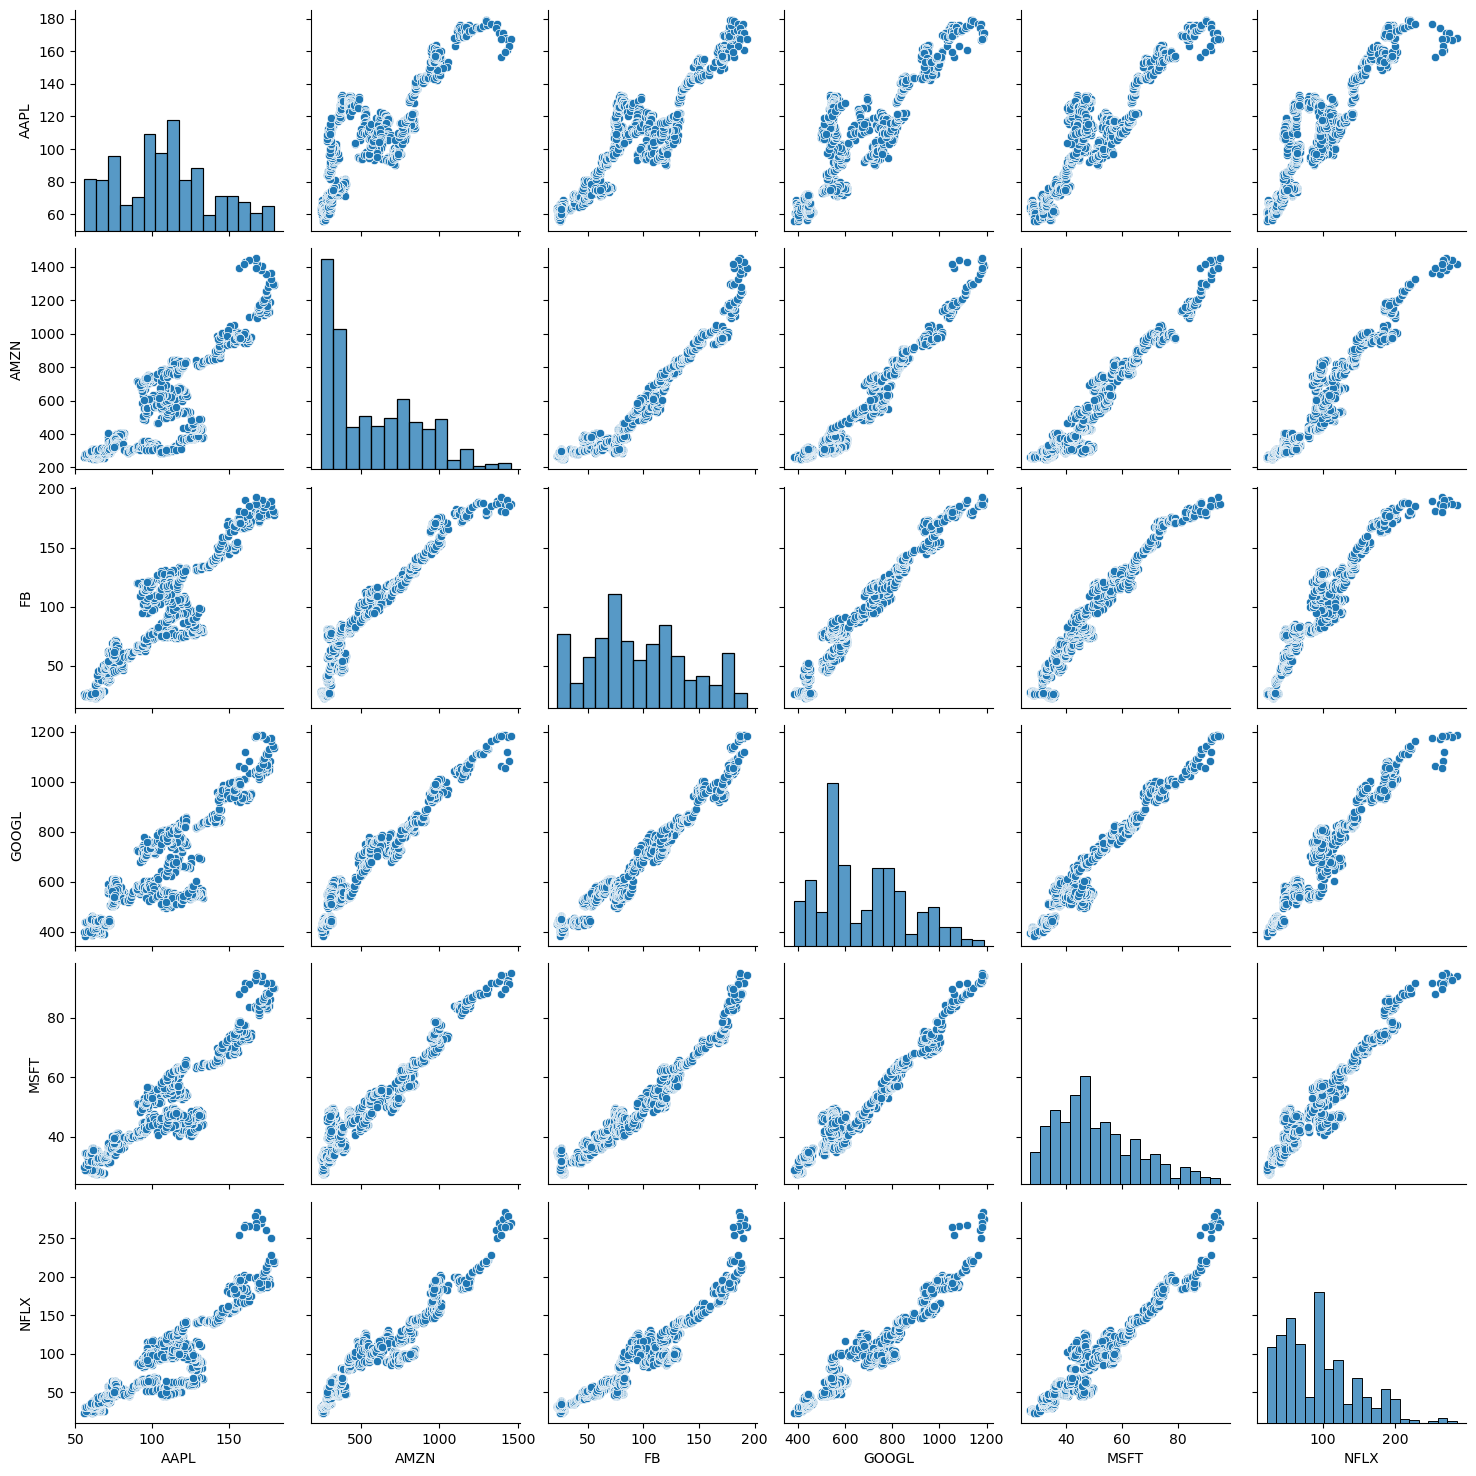

In [15]:
sns.pairplot(closing_prices)

Name    AAPL   AMZN     FB  GOOGL   MSFT   NFLX
Name                                           
AAPL   1.000  0.819  0.896  0.844  0.900  0.890
AMZN   0.819  1.000  0.954  0.974  0.956  0.955
FB     0.896  0.954  1.000  0.974  0.970  0.950
GOOGL  0.844  0.974  0.974  1.000  0.971  0.960
MSFT   0.900  0.956  0.970  0.971  1.000  0.959
NFLX   0.890  0.955  0.950  0.960  0.959  1.000


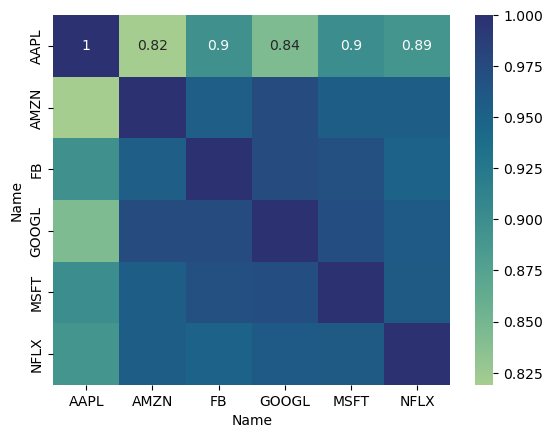

In [16]:
sns.heatmap(closing_prices.corr(), annot=True, cmap='crest')
print(closing_prices.corr().round(3))

We can see theres a high positive correlation among these companies, especially between, Amazon, Google, Facebook and Microsoft. Tells us that this could be dues to similar market trends, industry dynamics and other factors affecting the tech sector as a whole.